In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [36]:
day = pd.read_csv('./bike+sharing+dataset/day.csv')
hour = pd.read_csv('./bike+sharing+dataset/hour.csv')

# Day Dataframe Content

In [37]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [38]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [40]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Hour Dataframe Content

In [41]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Dataset format

- instant: unique record id
- dtday: date in YYYY-MM-DD format
- season: [1: spring, 2:summer, 3:fall, 4:winter]
- yr: [0: 2011, 1:2012]
- mnth: [1 to 12]
- hr: hour [0 to 23]
- weekday: day of the week [0..6] 
- holiday: [0: not holiday, 1:holiday]
- working day: [0: weeked or holiday 1: not weeked or holiday]
- weathersit :
  - Clear, Parly Cloudy
  - Mist, Cloudy
  - Light Snow, Light Rain, Thunderstorm 
  - Heavy Rain, Snow
- temp : Normalized temperature in Celsius (0.0 to 1.0). min=-8, max=+39 
- atemp: Normalized feeling temperature in Celsius (0.0 to 1.0). min=-16, max=+50
- hum: Normalized humidity (0.0 to 1.0) 
- windspeed: Normalized wind speed (0.0 to 1.0)
- casual: Casual users count
- registered: Registered users count
- cnt: Rental bikes count (casual + registered)

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

In [42]:
# drop column(s) we don't need
hour = hour.drop(columns=['instant'], errors='ignore')

print(f'Season: {hour["season"].unique()}')
print(f'Year: {hour["yr"].unique()}')
print(f'Month: {hour["mnth"].unique()}')
print(f'Hour: {hour["hr"].unique()}')
print(f'Weekday: {hour["weekday"].unique()}')
print(f'Holiday: {hour["holiday"].unique()}')
print(f'Working Day: {hour["workingday"].unique()}')
print(f'Weathersit: {hour["weathersit"].unique()}')

Season: [1 2 3 4]
Year: [0 1]
Month: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Hour: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Weekday: [6 0 1 2 3 4 5]
Holiday: [0 1]
Working Day: [0 1]
Weathersit: [1 2 3 4]


# Missing Values Analysis

In [43]:
print(hour.isnull().any())


dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


# Outliers
From the graph below we can see that there is a large number of bike rentals with low count, but they represent valid data.

<Axes: xlabel='cnt', ylabel='Count'>

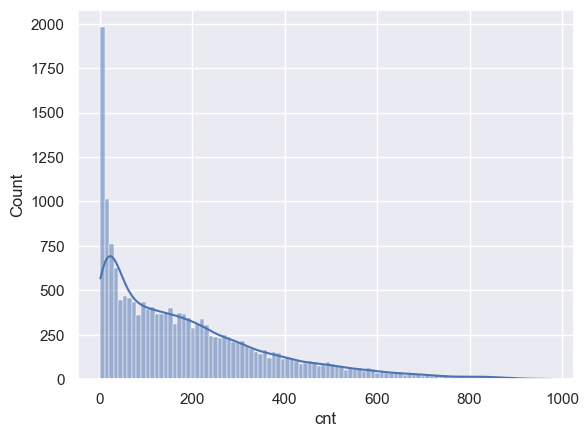

In [45]:
#sns.set(font_scale=1.0)
sns.histplot(hour["cnt"], kde=True, bins=100)

<Axes: xlabel='cnt_log', ylabel='Count'>

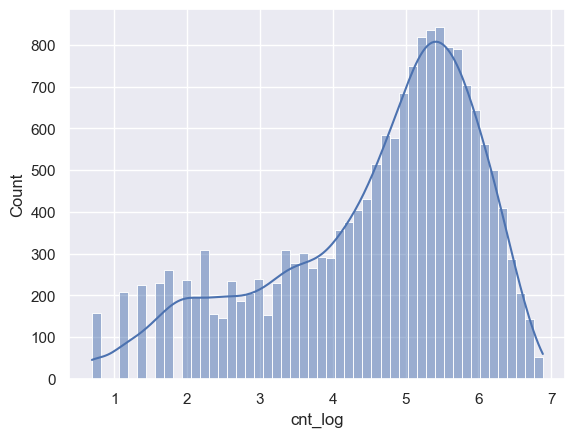

In [46]:
# Cnt is higly skewed. Log transform should improve model's accuracy
hour['cnt_log'] = np.log1p(hour['cnt'])
sns.histplot(hour['cnt_log'], kde=True, bins=50)

# Note: we will try predicting cnt_log, and will convert back
# to cnt using np.expm1(y_pred_log)

# Ensure categorical values are represented correctly
We one-hot encoded categorical values and save the result into a new dataset
The intent is to prepare the csv for usage later in the pipeline


In [47]:
# One-hot encode categorical columns. 
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit']

# categories have fixed values, known range
cat_map = {
    "season": [1, 2, 3, 4],      
    "yr": [0, 1],                       
    "mnth": list(range(1,13)),                              
    "hr": list(range(24)),                               
    "weekday": list(range(0,7)),      
    "weathersit": list(range(1,5))                       
}

# Format categories for OneHotEncoder (ie: list of category lists)
categories_for_encoder = [cat_map[c] for c in categorical_cols]

# Build encoder with explicit categories
# I don't set ignore error on purpose, as I want to surface them
encoder = OneHotEncoder(
    categories=categories_for_encoder,
    sparse_output=False
)

# Validate config (from given categories)
encoded = encoder.fit_transform(hour[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=hour.index)

# Assemble encoded dataset
hour_encoded = pd.concat([hour.drop(columns=categorical_cols), encoded_df], axis=1)

# Save the encoded dataset
hour_encoded.to_csv("hours_encoded.csv", index=False)  

In [48]:

# try first on original csv
train_val_df, test_df = train_test_split(
    hour, test_size=0.2, random_state=42, shuffle=True
)
train_df, val_df = train_test_split(
    train_val_df, test_size=0.25, random_state=42, shuffle=True
)

